<a href="https://colab.research.google.com/github/zxcvbnm010043-bot/plot_plate_boundary_pygmt/blob/main/U11310009_Homework_10_Plate_boundary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PyGMT 0.17 no Google Colab

> ⚠️ **Nota:** Há uma incompatibilidade temporária no sistema de resolução do conda/mamba no Colab (a versão do Python em uso é **3.12.11**, mas o solver pode conter um *pin* interno diferente).  
> Por isso, para instalar o PyGMT é necessário usar uma versão compatível do **condacolab** (ou ajustar o arquivo `pinned` do conda para **python=3.12**).  
> Depois disso, o **PyGMT 0.17** instala e executa normalmente. Isso será corrigido em uma atualização futura do Colab.


In [ ]:
!pip install condacolab --quiet
# need to install condacolab for a python 3.11 pin
import condacolab
condacolab.install_from_url("https://github.com/conda-forge/miniforge/releases/download/25.3.1-0/Miniforge3-Linux-x86_64.sh")

✨🍰✨ Everything looks OK!


**Don't PANIC !** The kernel will restart automatically.

After that, install `pygmt` normally.

In [2]:
!mamba install pygmt --quiet # <--- it takes around 1 minute

warning  libmamba [numpy-2.3.5-py312h33ff503_0] The following files were already present in the environment:
    - bin/f2py
    - bin/numpy-config


In [3]:
import pygmt
pygmt.show_versions()

PyGMT information:
  version: v0.17.0
System information:
  python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
  executable: /usr/bin/python3.real
  machine: Linux-6.6.105+-x86_64-with-glibc2.35
Dependency information:
  numpy: 2.3.5
  pandas: 2.3.3
  xarray: 2025.11.0
  packaging: 25.0
  contextily: None
  geopandas: 1.1.1
  IPython: 7.34.0
  pyarrow: 18.1.0
  rioxarray: None
  gdal: 3.11.0
  ghostscript: 10.06.0
GMT library information:
  version: 6.5.0
  padding: 2
  share dir: /usr/local/share/gmt
  plugin dir: /usr/local/lib/gmt/plugins
  library path: /usr/local/lib/libgmt.so
  cores: 2
  grid layout: rows
  image layout: 
  binary version: 6.5.0


gmtread [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
gmtread [NOTICE]: SRTM15 Earth Relief v2.7 at 1x1 arc degrees reduced by Gaussian Cartesian filtering (314.5 km fullwidth) [Tozer et al., 2019].
gmtread [NOTICE]:   -> Download grid file [111K]: earth_relief_01d_p.grd


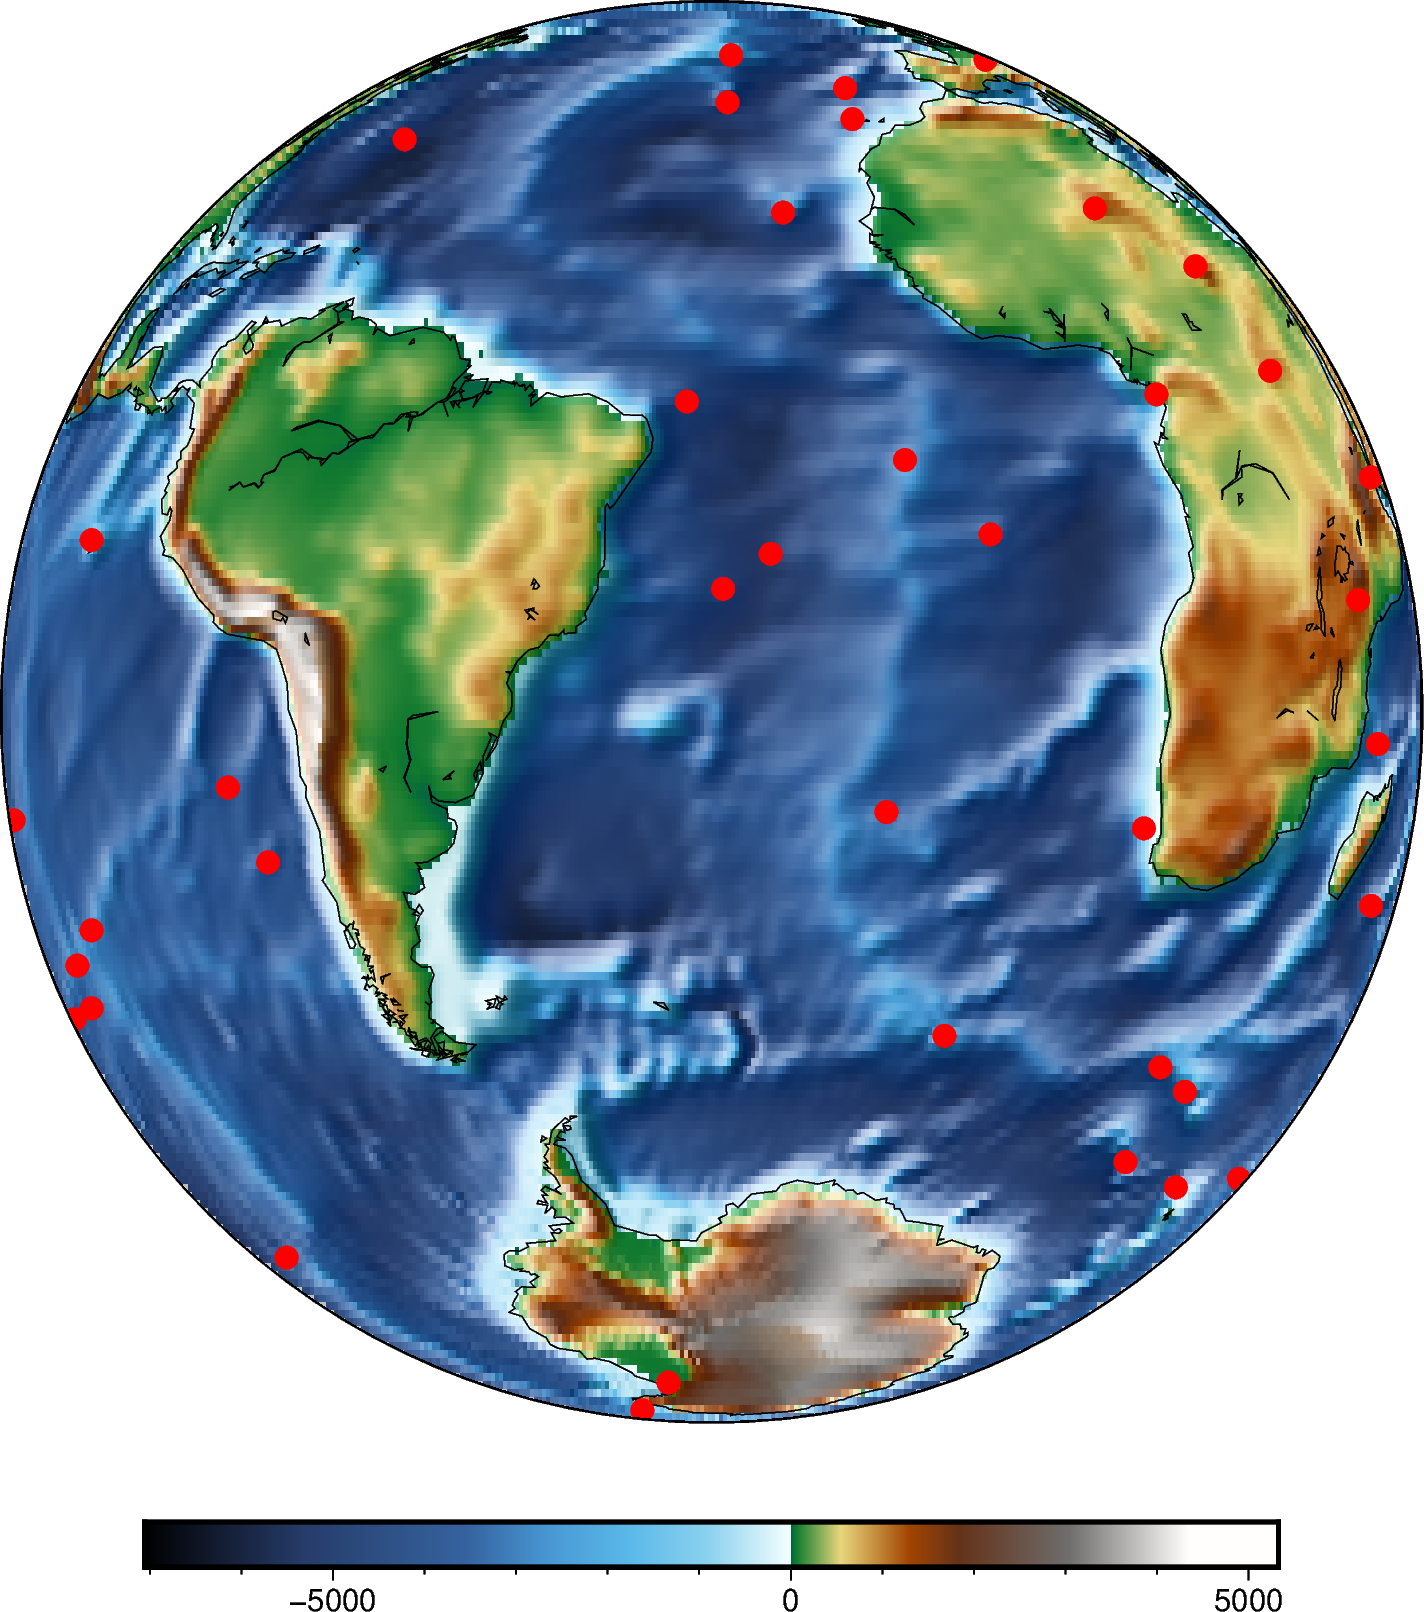

In [4]:
# Just an example
from pygmt.datasets import load_earth_relief #<-- Use global relief for topography

grid = load_earth_relief(resolution='01d', registration='pixel')

fig = pygmt.Figure()
fig.basemap(region='g', projection='G330/-30/12c', frame=True)
fig.grdimage(grid, cmap='geo', shading=True)
fig.coast(resolution='c', shorelines=True, area_thresh=1000)
fig.plot(data='@hotspots.txt', style='c0.2c', fill='red')
fig.colorbar()
fig.show()

### 🌊 Aproveite o PyGMT 🌍  
Crie mapas e figuras incríveis diretamente no seu **notebook do Colab** —  
com o poder do **PyGMT 0.17.0**, **GMT** e **Python 3.12**. Veja mais exemplos em [**Recursos Externos do PyGMT**](https://www.pygmt.org/v0.17.0/external_resources.html).

> _Boas mapas!_ 🗺️


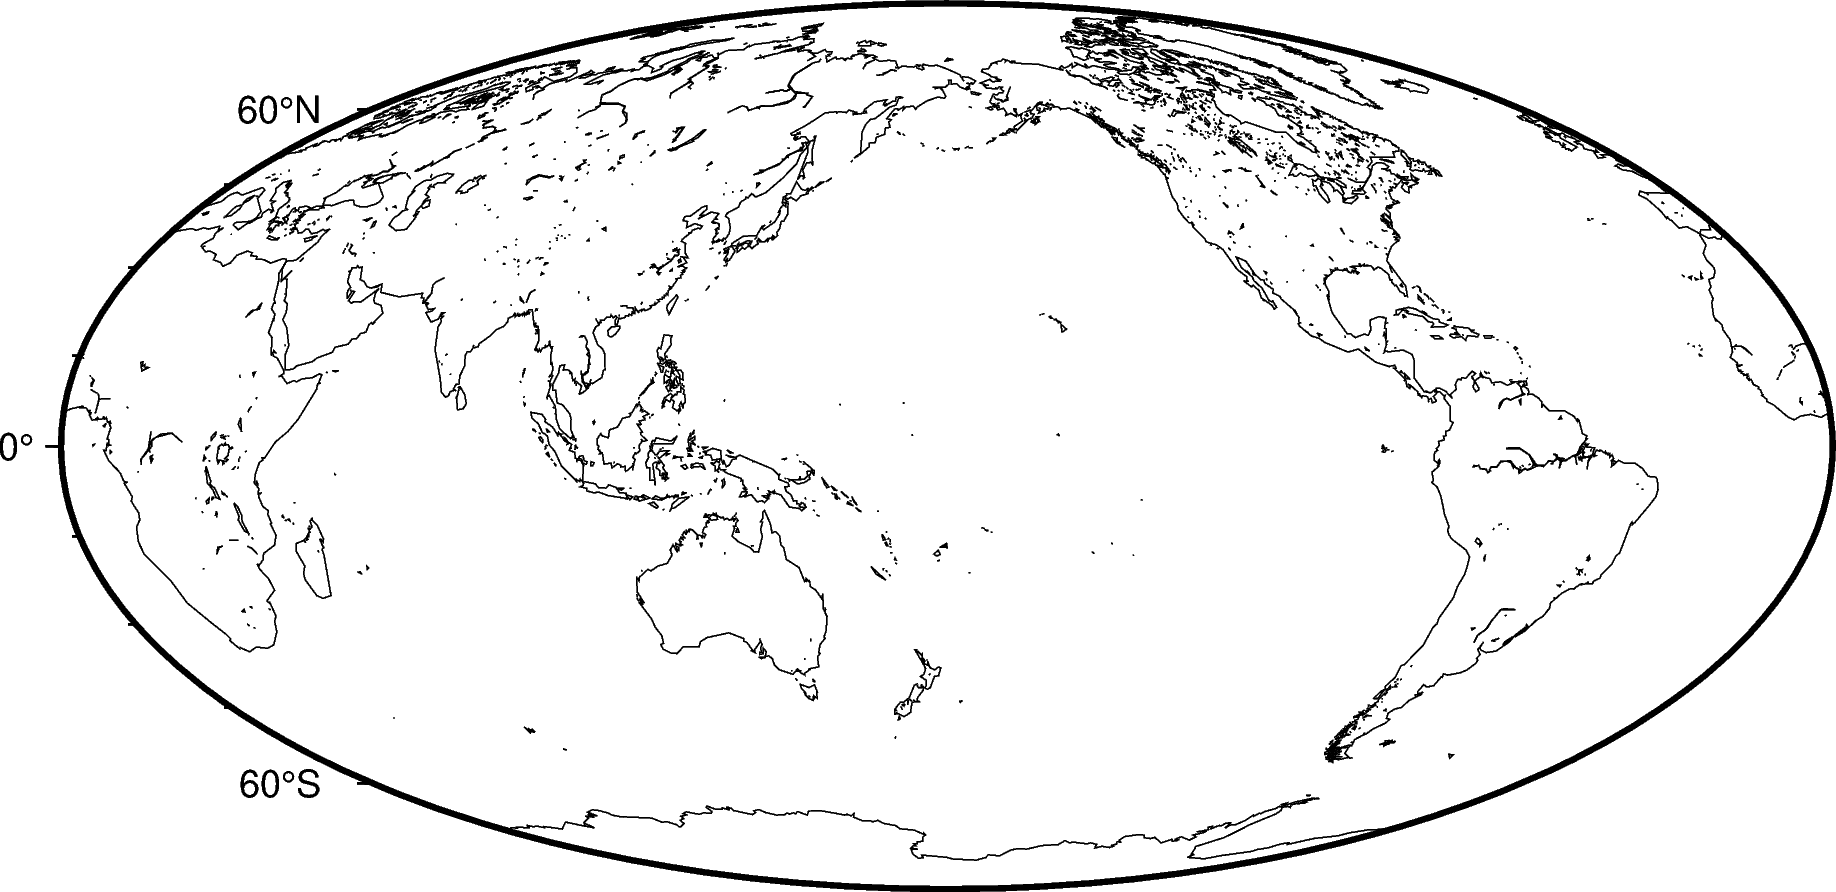

In [5]:
fig = pygmt.Figure()
fig.basemap(region="g", projection="W15c", frame=True)
fig.coast(shorelines=True)
fig.show()

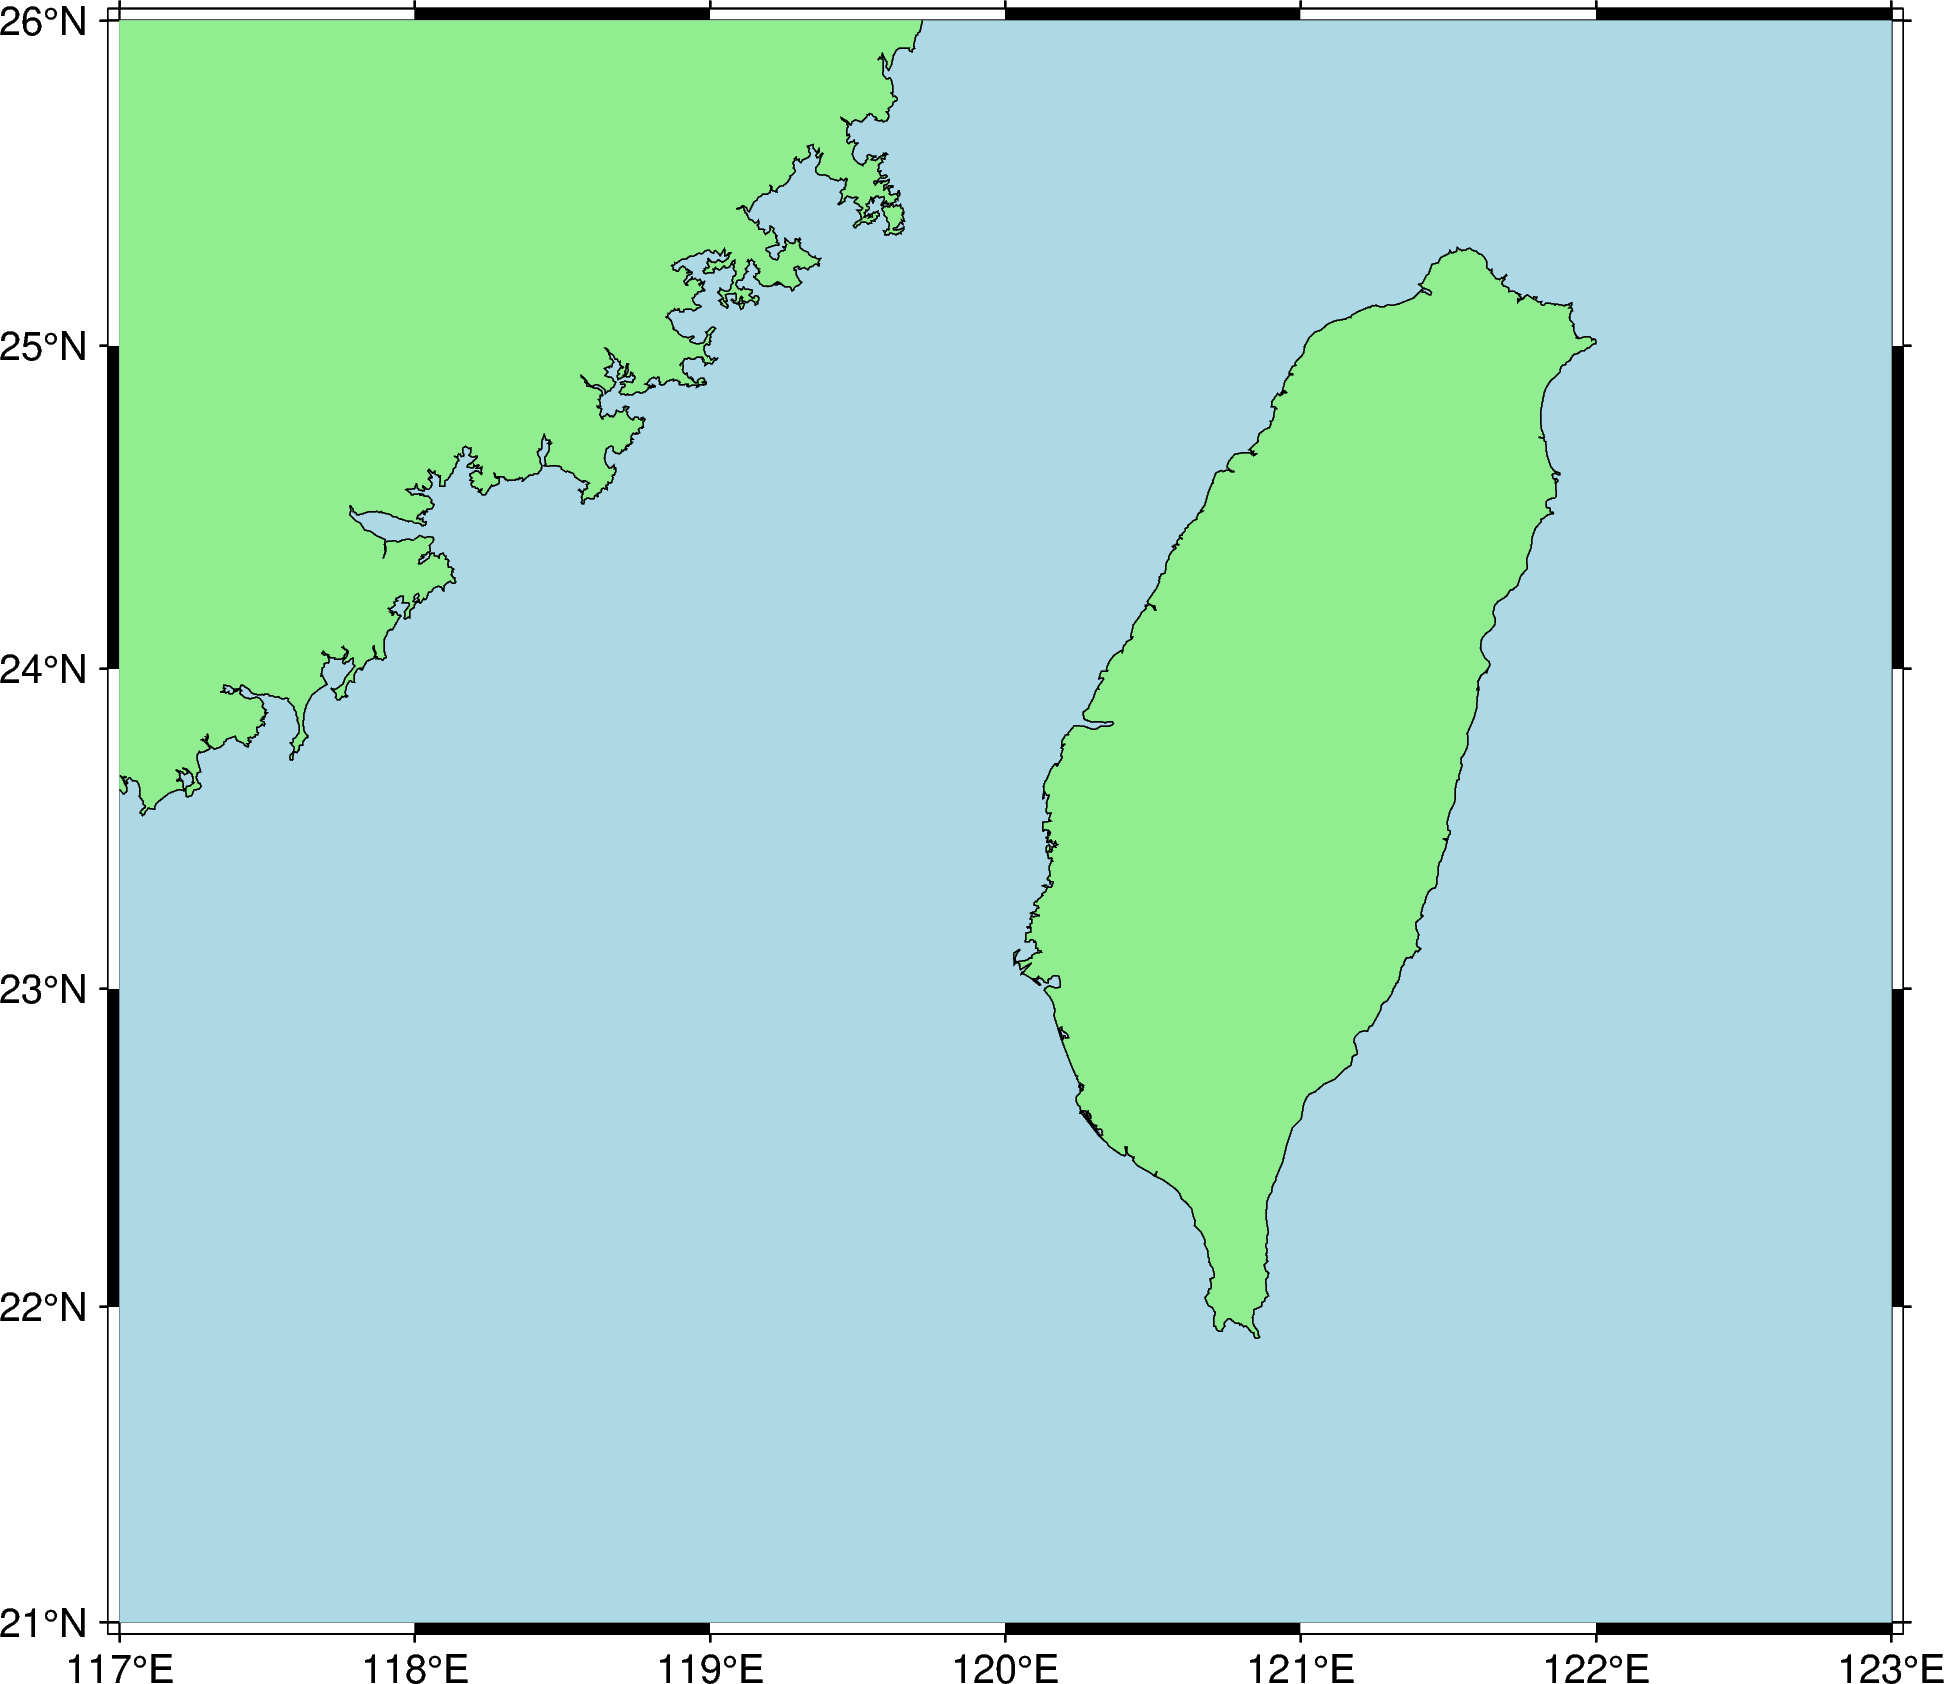

In [6]:
import pygmt

fig = pygmt.Figure()
fig.basemap(region='117/123/21/26', projection='M15c', frame=['a', 'g'])
fig.coast(shorelines=True, resolution='h', area_thresh=1000, water='lightblue', land='lightgreen')
fig.show()

In [8]:
import pygmt
from pygmt.datasets import load_earth_relief

# 定義台灣周邊區域 (lon_min/lon_max/lat_min/lat_max)
region = [115, 125, 19, 27]

# 載入地球起伏資料 (3 arc-second 解析度)
grid = load_earth_relief(region=region, resolution='03s')

fig = pygmt.Figure()

# --- 設置地圖底圖 (Basemap) ---
# projection='M15c' 表示 Mercator 投影，寬度 15 公分
fig.basemap(region=region, projection='M15c', frame=['a', 'g'])

# --- 繪製地形/海床圖 (grdimage) ---
# 🎨 關鍵修改 1: 將 cmap 改為 'geo' (適合海陸資料的色板)
# shading=True 添加陰影以增強立體感
fig.grdimage(grid, cmap='geo', shading=True)

# --- 繪製海岸線 (Coastlines) ---
# 關鍵修改 2: 移除 water='lightblue'
# 這樣海洋的顏色將由上方的 'geo' CPT 決定，從而顯示深淺變化
fig.coast(
    shorelines=True,
    resolution='h',
    area_thresh=1000,
    land='lightgreen' # 陸地顏色保持綠色
)

# --- 添加色條 (Colorbar) ---
# 關鍵修改 3: 調整色條標籤，因為 'geo' 色板通常包含負值（水深）
# 假設負值為水深，正值為海拔，色條從較深的水色開始
fig.colorbar(
    frame=['a2000f1000+l"Elevation in meters"']
)

# 顯示圖形
fig.show()

psconvert [ERROR]: System call [gs -q -dNOPAUSE -dBATCH -dNOSAFER -dSCANCONVERTERTYPE=2 -dMaxBitmap=2147483647 -dUseFastColor=true -dGraphicsAlphaBits=2 -dTextAlphaBits=2 -sDEVICE=png16m  -g1911x1826 -r300 -sOutputFile='/tmp/85336e7801f740a49a1e3047b2cd5ba1-preview-5irdyuvj/85336e7801f740a49a1e3047b2cd5ba1.png' '/root/.gmt/sessions/gmt_session.1172/psconvert_1172d.eps'] returned error 2.


GMTCLibError: Module 'psconvert' failed with status code 79:
psconvert [ERROR]: System call [gs -q -dNOPAUSE -dBATCH -dNOSAFER -dSCANCONVERTERTYPE=2 -dMaxBitmap=2147483647 -dUseFastColor=true -dGraphicsAlphaBits=2 -dTextAlphaBits=2 -sDEVICE=png16m  -g1911x1826 -r300 -sOutputFile='/tmp/85336e7801f740a49a1e3047b2cd5ba1-preview-5irdyuvj/85336e7801f740a49a1e3047b2cd5ba1.png' '/root/.gmt/sessions/gmt_session.1172/psconvert_1172d.eps'] returned error 2.

# Homework-Geophysics-India Plate

In [9]:
# 步驟 1: 安裝 Conda Colab
!pip install -q condacolab
import condacolab
condacolab.install()

# 步驟 2: 使用 mamba 安裝 PyGMT 及其依賴
# 注意：這個步驟執行完後，您可能需要手動點擊 Colab 的 "重新啟動執行階段" (Restart Runtime)
!mamba install pygmt -y

✨🍰✨ Everything looks OK!
conda-forge/linux-64                                        Using cache
conda-forge/noarch                                          Using cache
[+] 0.0s
[+] 0.0s

Pinned packages:

  - python=3.12

Pinned packages:

  - python_abi[version="=3.12",build="*cp312*"]

Pinned packages:

  - cuda-version=12

Pinned packages:

  - python=3.12


Transaction

  Prefix: /usr/local

  All requested packages already installed


Transaction starting
[+] 0.0s

Transaction finished



gmtwhich [ERROR]: File india_plate_boundary.gmt not found!
plot [ERROR]: Cannot find file india_plate_boundary.gmt


繪圖失敗。請檢查資料檔案路徑與格式是否正確：Module 'plot' failed with status code 72:
plot [ERROR]: Cannot find file india_plate_boundary.gmt


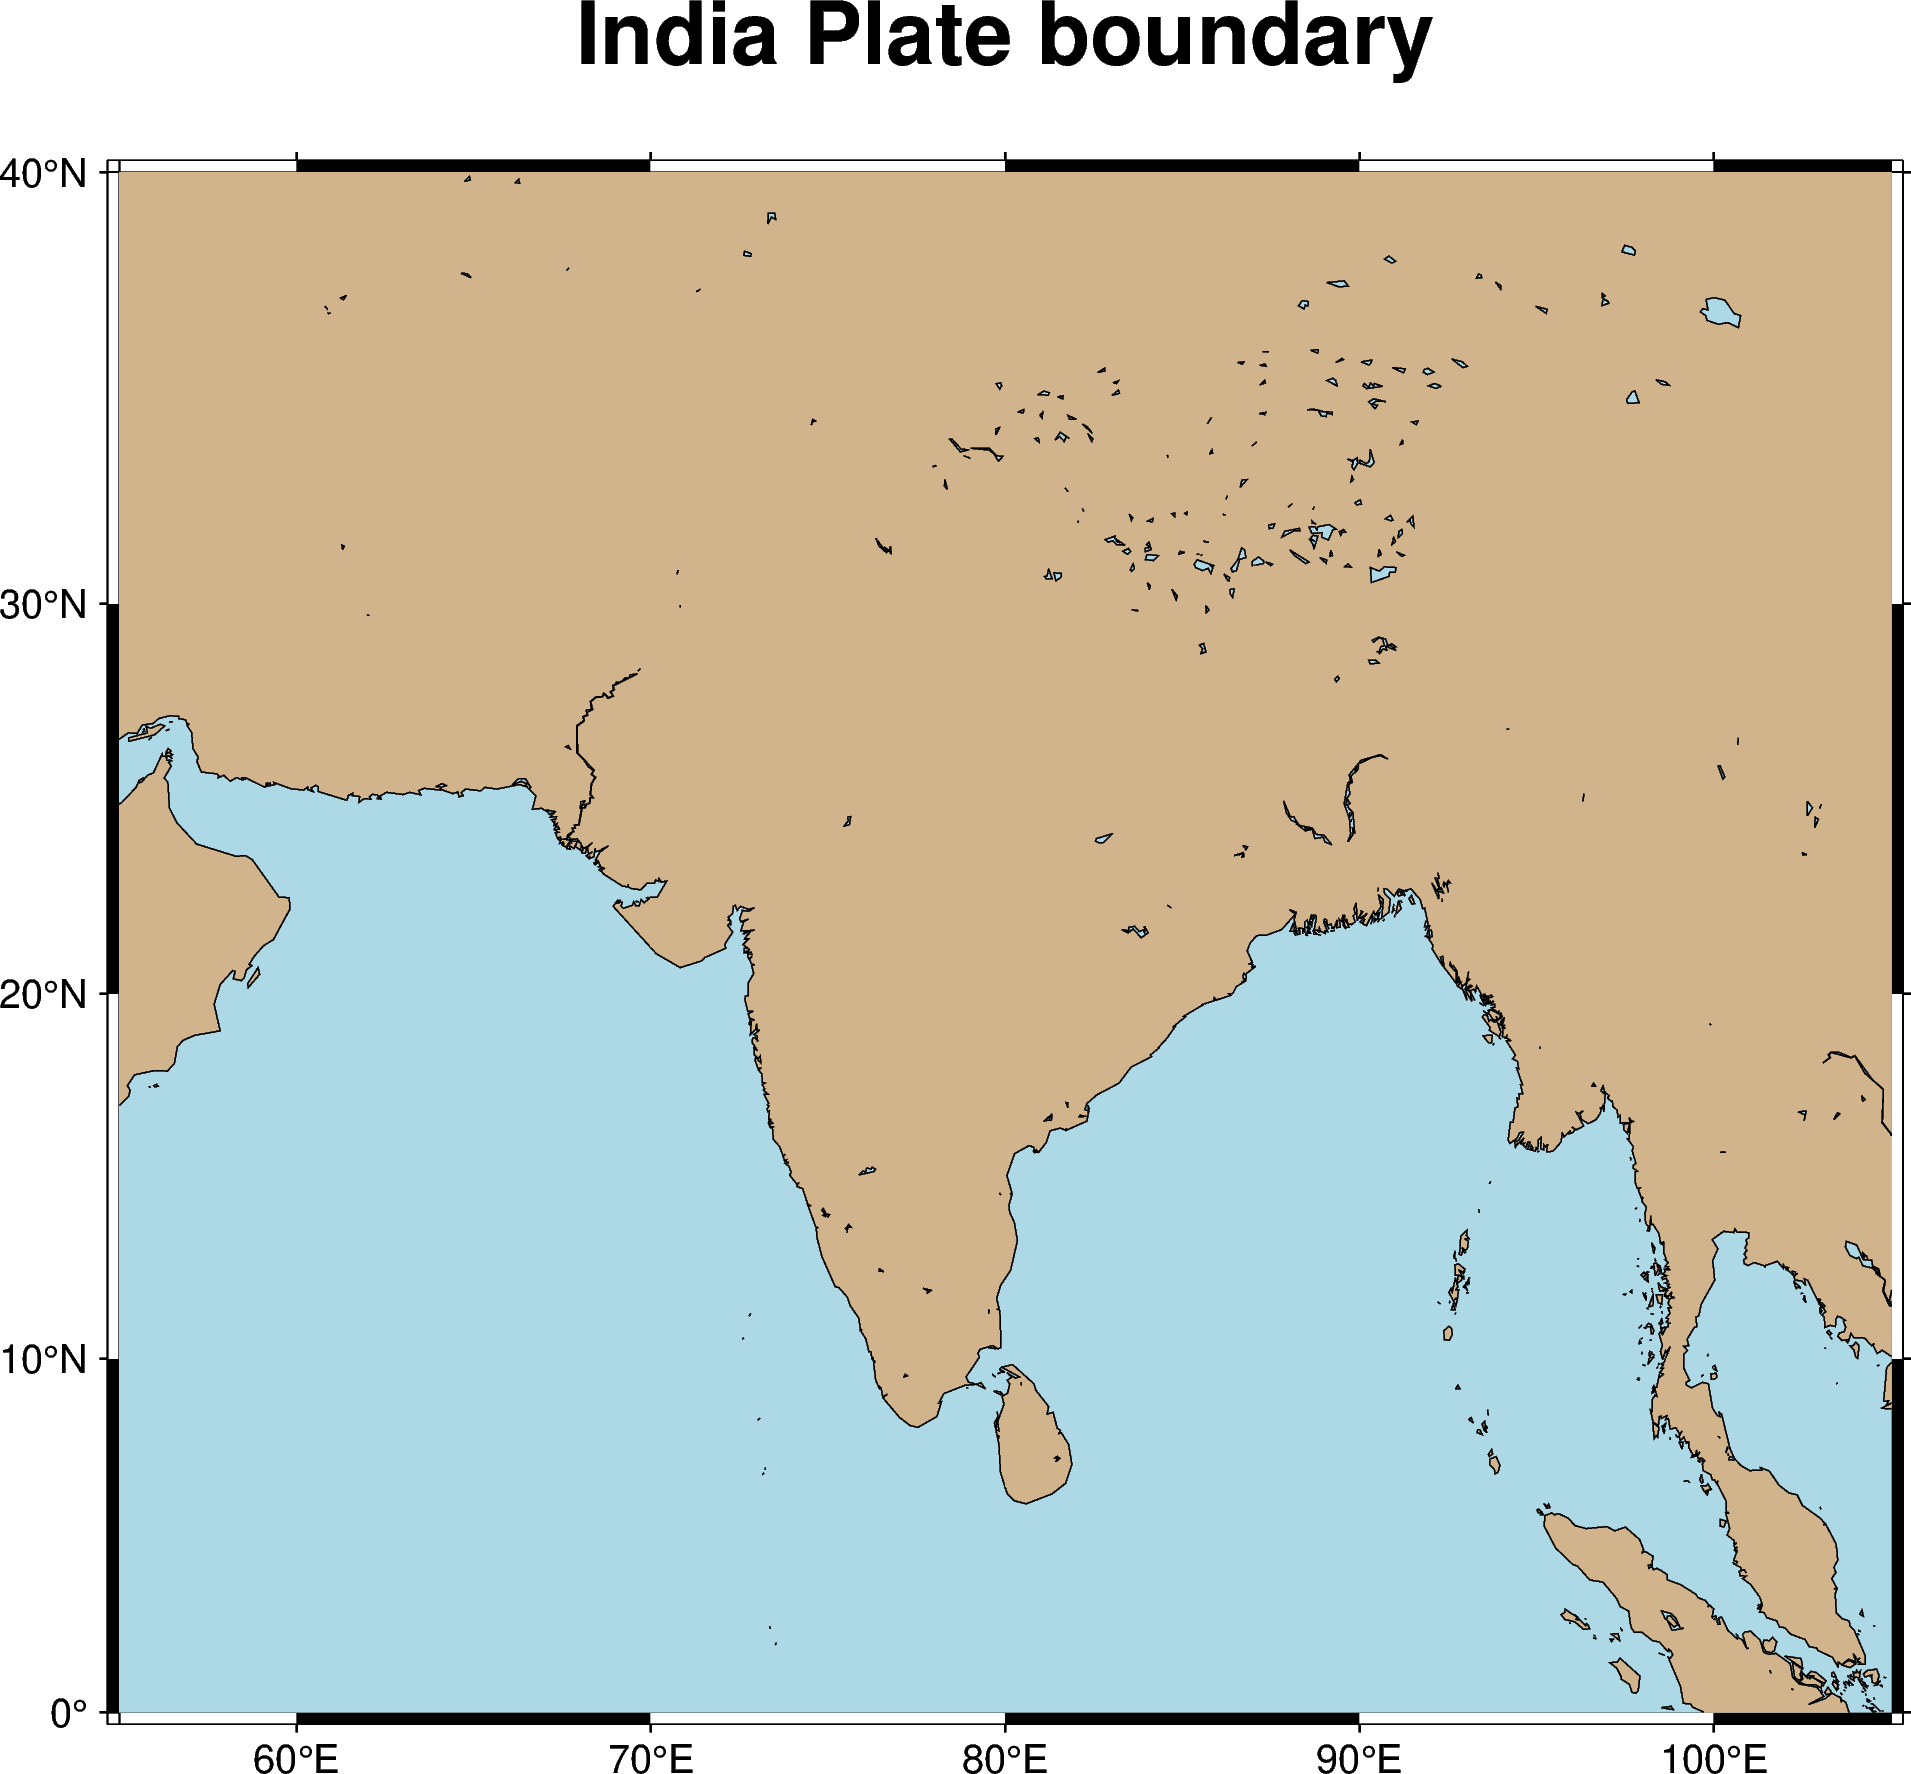

In [10]:
import pygmt

# -----------------------------------------------------
# 【重要】將此處替換為您實際的資料檔案路徑
PLATE_BOUNDARY_DATA = "india_plate_boundary.gmt"
# -----------------------------------------------------

fig = pygmt.Figure()

# 1. 設置地圖範圍和投影 (與上次範例相同)
fig.basemap(
    region=[55, 105, 0, 40], # 印度板塊區域
    projection="M15c",
    frame=["a", "+t India Plate boundary"]
)

# 2. 繪製陸地與海洋作為背景
fig.coast(
    shorelines=True,
    water="lightblue",
    land="tan",
    resolution="l"
)

# 3. 應用資料：使用 fig.plot() 繪製板塊邊界線
try:
    fig.plot(
        # 傳入您的資料檔案路徑
        data=PLATE_BOUNDARY_DATA,
        # 設定線條樣式：寬度2點，紅色 (red)，實線
        pen="2p,red",
        # 忽略檔案中的任何屬性列 (如果您的資料是簡單的經緯度列表)
        # header=">",
    )
    print(f"成功嘗試使用檔案：{PLATE_BOUNDARY_DATA}")

except Exception as e:
    # 如果找不到檔案或讀取錯誤，會輸出提示
    print(f"繪圖失敗。請檢查資料檔案路徑與格式是否正確：{e}")


# 4. 顯示圖形
fig.show()

In [12]:
import os
import pandas as pd
from io import StringIO

# 1. 下載板塊邊界資料到 Colab 本地 (使用 wget)
PLATE_BOUNDARY_FILE = "PB2002_boundaries.gmt"
print(f"嘗試下載板塊邊界資料到 {PLATE_BOUNDARY_FILE}...")
!wget -O $PLATE_BOUNDARY_FILE https://raw.githubusercontent.com/gmt-china/public-data/master/PB2002/PB2002_boundaries.gmt

# 2. 創建火山資料檔案
VOLCANO_FILE = "volcanoes.txt"
VOLCANO_DATA = """
83.53 11.27 Barren_Island
93.87 12.28 Narcondam
67.43 25.13 Koh-i-Taftan
70.25 28.52 Bazman
""" # 移除標題行，避免 GMT 誤讀
with open(VOLCANO_FILE, "w") as f:
    f.write(VOLCANO_DATA)
print(f"火山資料已寫入到 {VOLCANO_FILE}...")

if os.path.exists(PLATE_BOUNDARY_FILE) and os.path.exists(VOLCANO_FILE):
    print("\n✅ 資料準備完成，請執行下一步繪圖程式碼。")
else:
    print("\n❌ 警告：檔案下載或寫入失敗，請檢查 Colab 輸出。")

嘗試下載板塊邊界資料到 PB2002_boundaries.gmt...
--2025-11-25 07:43:05--  https://raw.githubusercontent.com/gmt-china/public-data/master/PB2002/PB2002_boundaries.gmt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-11-25 07:43:05 ERROR 404: Not Found.

火山資料已寫入到 volcanoes.txt...

✅ 資料準備完成，請執行下一步繪圖程式碼。


<>:54: SyntaxWarning: invalid escape sequence '\s'
<>:54: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1670894693.py:54: SyntaxWarning: invalid escape sequence '\s'
  volcanoes = pd.read_csv(VOLCANO_DATA_FILE, sep='\s+', header=None, names=['Lon', 'Lat', 'Name'])
/usr/local/lib/python3.12/site-packages/pygmt/src/plot.py:303: SyntaxWarning: Short-form parameter 'A' is not recommended. Use long-form parameter 'straight_line' instead.
  aliasdict.merge(kwargs)
plot [WARNING]: File PB2002_boundaries.gmt is empty!


✓ 板塊邊界線繪製程式碼已執行。
❌ 繪製火山位置時發生錯誤: Unrecognized parameter 'color'.


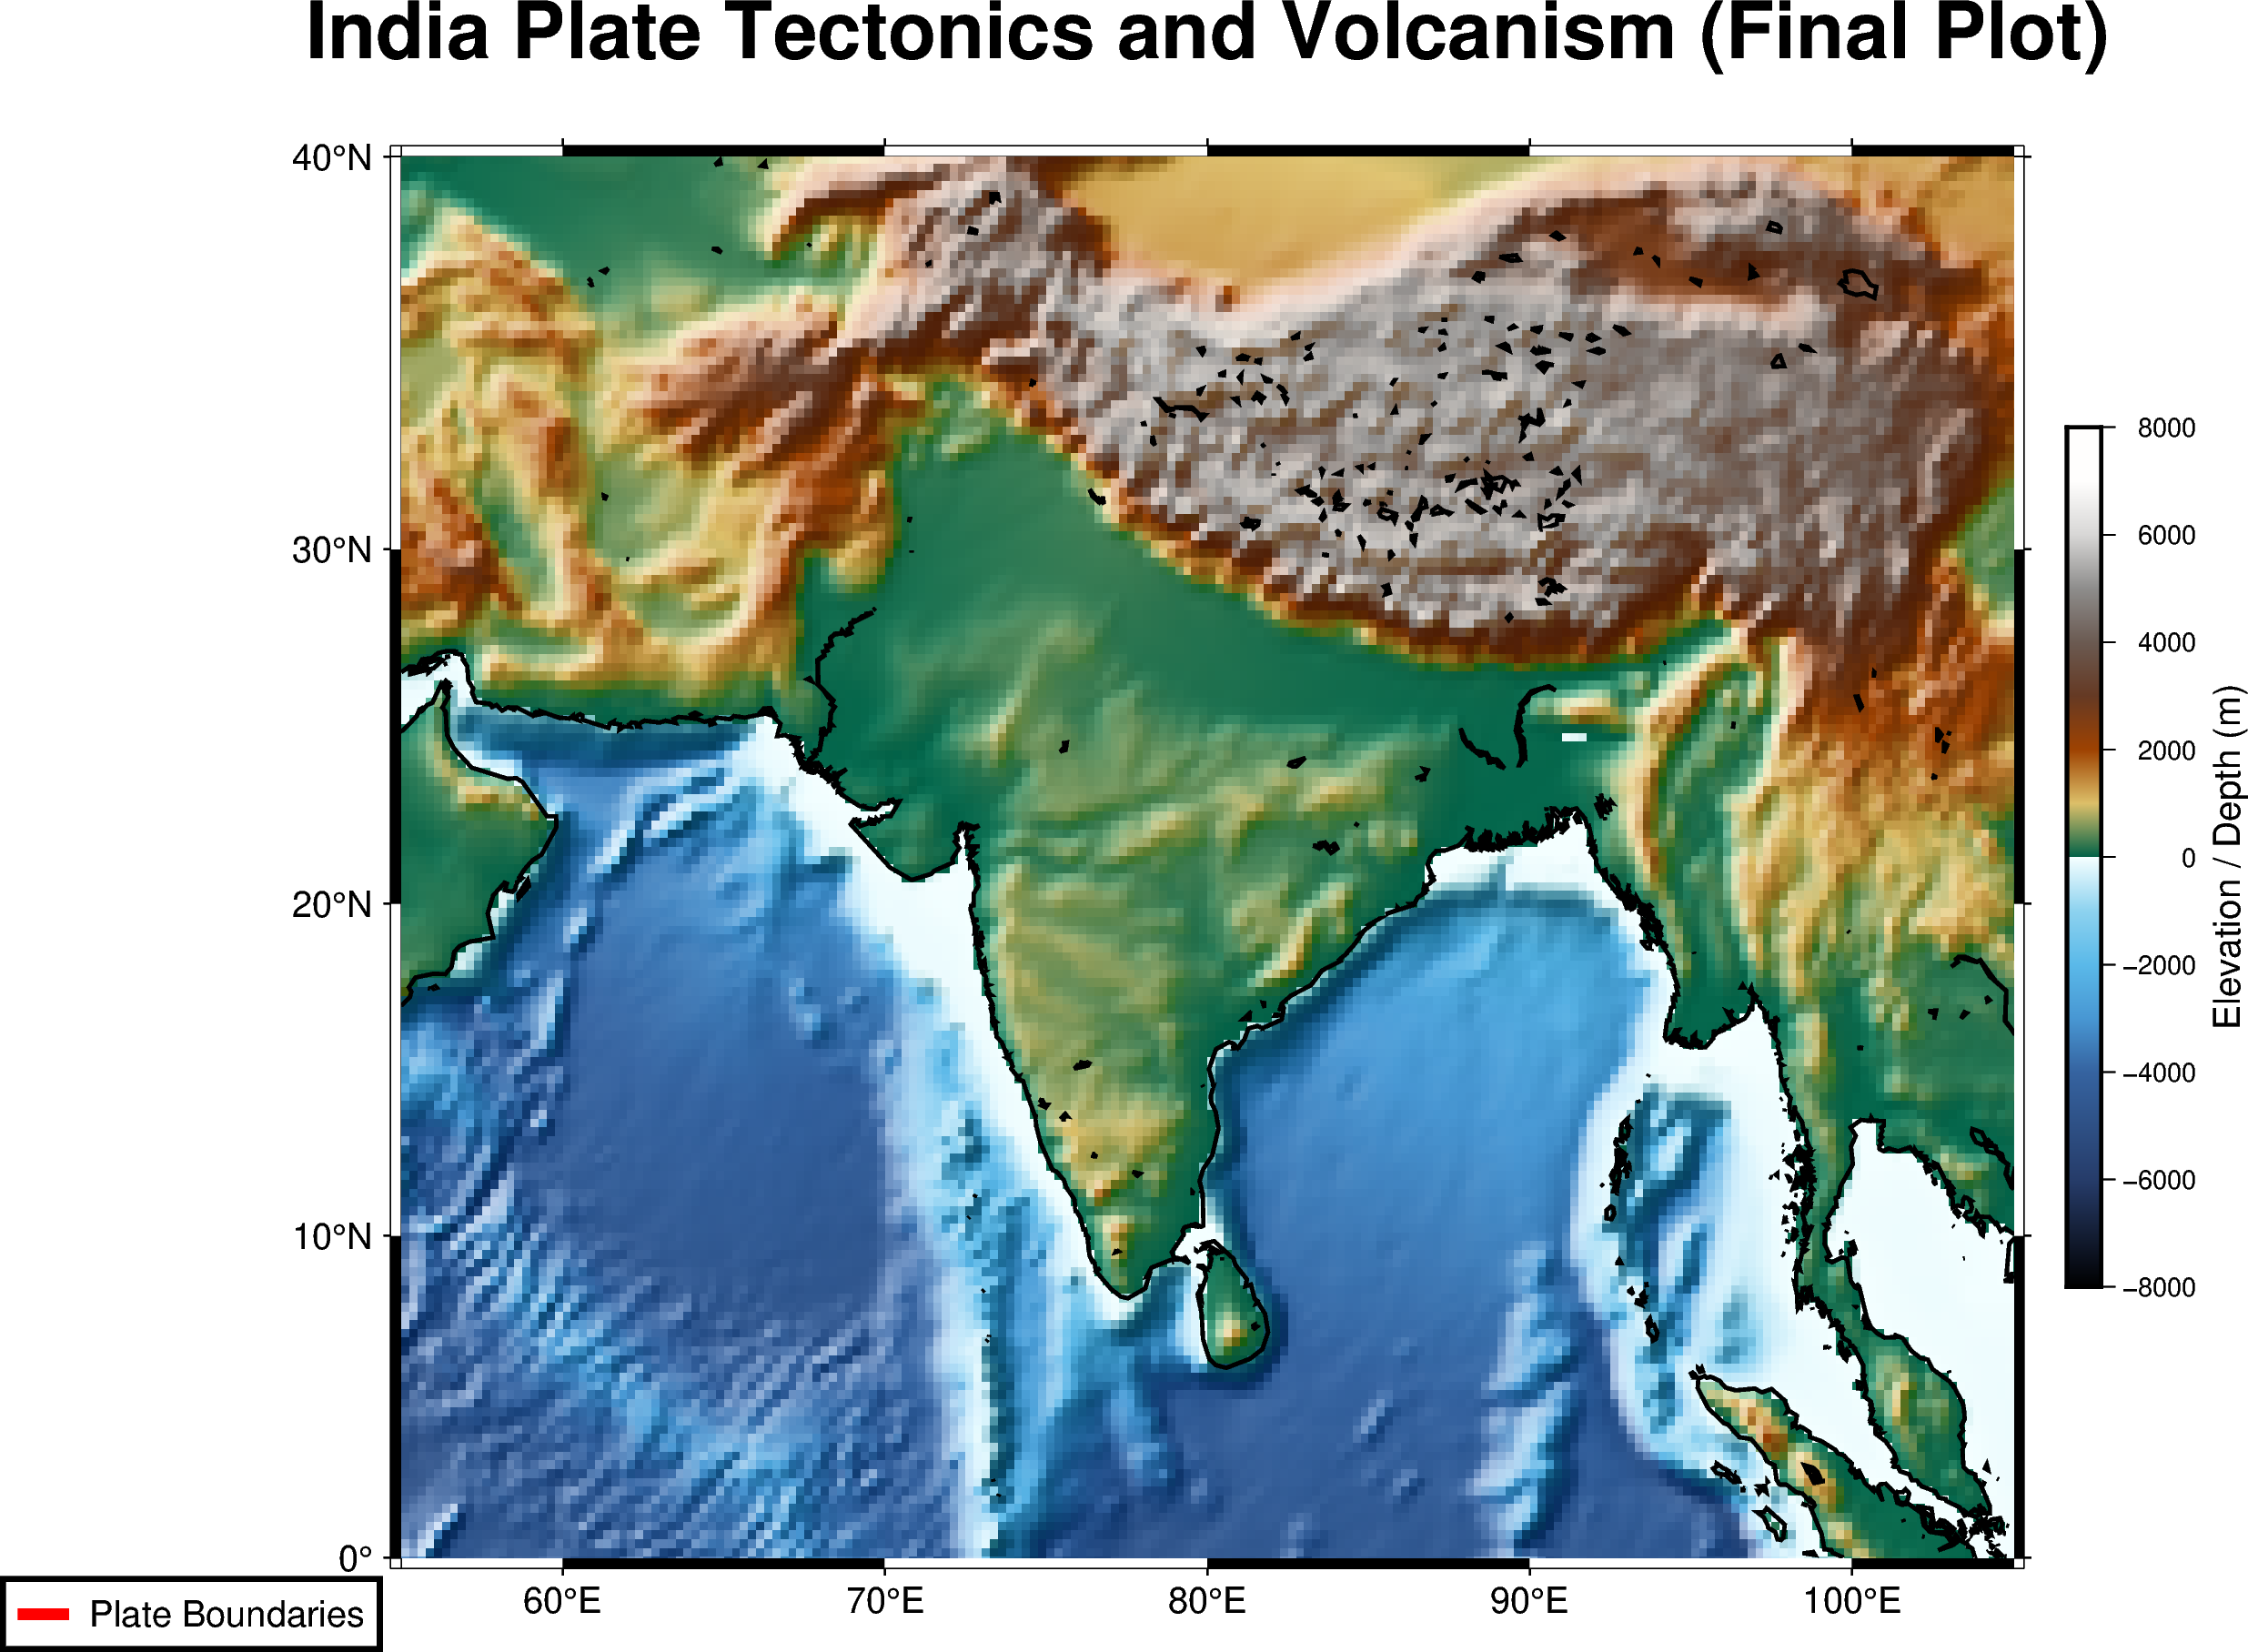

In [13]:
import pygmt
import pandas as pd
from io import StringIO
import os

# 使用步驟一建立的本地檔案路徑 (假設步驟一已成功下載/創建這兩個檔案)
PLATE_BOUNDARY_DATA = "PB2002_boundaries.gmt"
VOLCANO_DATA_FILE = "volcanoes.txt"
RELIEF_DATA_RES = "@earth_relief_15m"
REGION = [55, 105, 0, 40]

fig = pygmt.Figure()

# 1. 設置 basemap
fig.basemap(
    region=REGION,
    projection="M15c",
    frame=["a", "+t India Plate Tectonics and Volcanism (Final Plot)"]
)

# 2. 繪製地形圖
pygmt.makecpt(
    cmap="geo", series=[-8000, 8000, 1000], continuous=True
)
fig.grdimage(
    grid=RELIEF_DATA_RES, region=REGION, shading=True
)

# 3. 繪製海岸線
fig.coast(
    shorelines="1p,black", resolution="l"
)

# 4. 繪製板塊邊界線 (關鍵修復：加入 A=True 參數)
if os.path.exists(PLATE_BOUNDARY_DATA):
    try:
        fig.plot(
            data=PLATE_BOUNDARY_DATA,
            pen="3p,red",
            label="Plate Boundaries",
            # 關鍵修正：強制將多段線檔案繪製出來，解決本地檔案解析失敗的問題
            A=True
        )
        print("✓ 板塊邊界線繪製程式碼已執行。")
    except Exception as e:
        print(f"❌ 繪製板塊邊界時發生錯誤: {e}")
else:
     print("❌ 錯誤：找不到板塊邊界本地檔案。")

# 5. 繪製火山位置 (使用前一步成功的 Pandas 傳入 Series 方法，確保成功)
if os.path.exists(VOLCANO_DATA_FILE):
    try:
        # 讀取數據，並指定欄位名稱
        volcanoes = pd.read_csv(VOLCANO_DATA_FILE, sep='\s+', header=None, names=['Lon', 'Lat', 'Name'])

        fig.plot(
            x=volcanoes['Lon'],
            y=volcanoes['Lat'],
            style="c0.3c",
            color="red",
            pen="0.5p,black",
            label="Active Volcanoes"
        )
        print("✓ 火山位置繪製程式碼已執行。")
    except Exception as e:
        print(f"❌ 繪製火山位置時發生錯誤: {e}")
else:
    print("❌ 錯誤：找不到火山本地檔案。")


# 6. 增加圖例和顏色條
fig.legend(position="JBL+o0.2c", box=True)
fig.colorbar(
    frame=["a2000", "x+lElevation / Depth (m)"],
    position="JMR+w8c+v+o0.5c/0",
)

# 7. 顯示圖形
fig.show()

text [WARNING]: Representation of font type not recognized. Using default.
text [WARNING]: Representation of font type not recognized. Using default.
text [WARNING]: Representation of font type not recognized. Using default.


✓ PB2002 板塊邊界下載成功（GeoJSON）


text [WARNING]: Representation of font type not recognized. Using default.


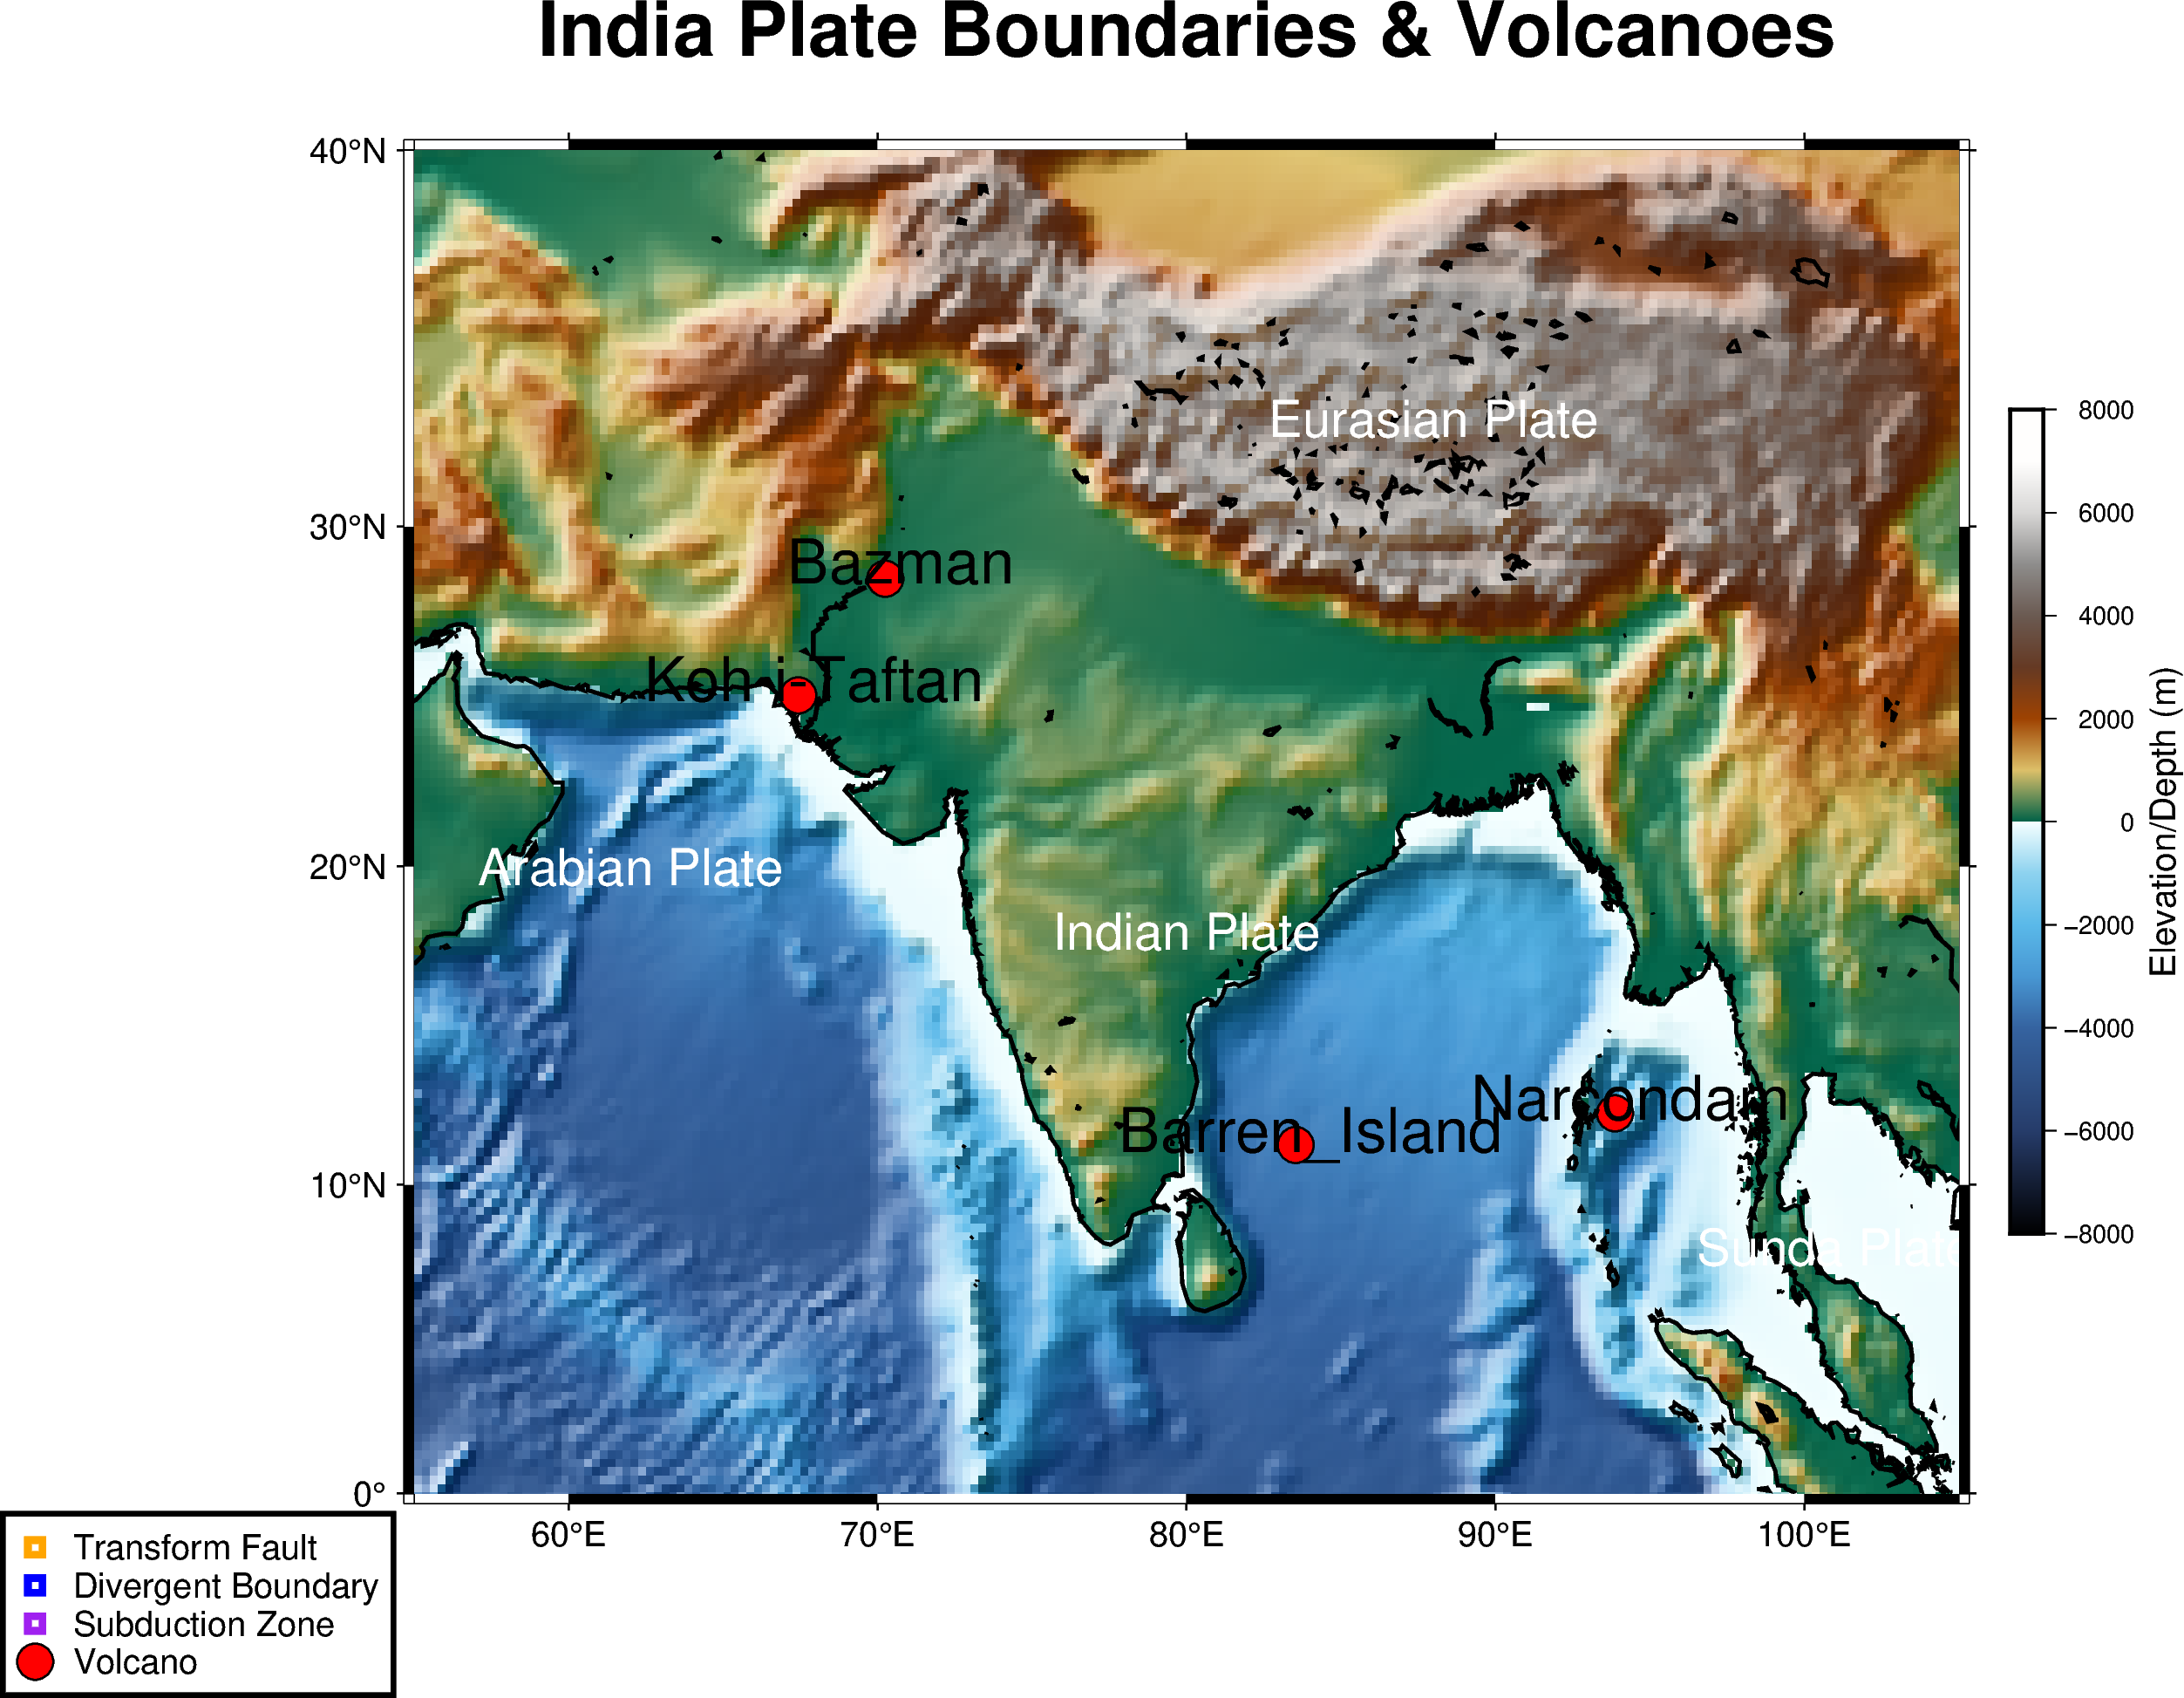

In [23]:
import pygmt
import pandas as pd
import geopandas as gpd
import urllib.request
from io import StringIO

# ======================================================================
# 1. 資料準備
# ======================================================================

# A. PB2002 板塊邊界（GeoJSON 格式，來源：fraxen/tectonicplates）
PB2002_URL = "https://raw.githubusercontent.com/fraxen/tectonicplates/master/GeoJSON/PB2002_boundaries.json"
LOCAL_BOUNDARY = "PB2002_boundaries.json"

# 下載 GeoJSON（安全且穩定）
urllib.request.urlretrieve(PB2002_URL, LOCAL_BOUNDARY)
print("✓ PB2002 板塊邊界下載成功（GeoJSON）")

# 用 GeoPandas 讀取 GeoJSON
gdf = gpd.read_file(LOCAL_BOUNDARY)

# 分類板塊邊界類型
subduction = gdf[gdf['Type'] == 'Subduction']
transform = gdf[gdf['Type'] == 'Transform']
divergent = gdf[gdf['Type'] == 'Divergent']

# B. 火山資料
volcano_data_str = """
83.53 11.27 Barren_Island
93.87 12.28 Narcondam
67.43 25.13 Koh-i-Taftan
70.25 28.52 Bazman
"""
volcanoes = pd.read_csv(StringIO(volcano_data_str), sep=r"\s+", header=None, names=["Lon", "Lat", "Name"])

# C. 地形資料與地圖區域
RELIEF_DATA = "@earth_relief_15m"
REGION = [55, 105, 0, 40]

# ======================================================================
# 2. 繪圖
# ======================================================================

fig = pygmt.Figure()

# 1. Basemap
fig.basemap(
    region=REGION,
    projection="M15c",
    frame=["a", "+t India Plate Boundaries & Volcanoes"]
)

# 2. 地形影像
pygmt.makecpt(cmap="geo", series=[-8000, 8000, 1000], continuous=True)
fig.grdimage(RELIEF_DATA, region=REGION, shading=True)

# 3. 海岸線
fig.coast(shorelines="1p,black", resolution="l")

# ======================================================================
# 3. 繪製板塊邊界（斷層面）
# ======================================================================

# 轉形斷層（橘）
fig.plot(data=transform, pen="2p,orange", label="Transform Fault")

# 張裂（藍）
fig.plot(data=divergent, pen="2p,blue", label="Divergent Boundary")

# 匯聚（紫）
fig.plot(data=subduction, pen="2p,purple", label="Subduction Zone")

# ======================================================================
# 4. 火山與名稱
# ======================================================================

# 火山點
fig.plot(
    x=volcanoes["Lon"],
    y=volcanoes["Lat"],
    style="c0.35c",
    fill="red",
    pen="0.5p,black",
    label="Volcano"
)

# 火山名稱
for _, row in volcanoes.iterrows():
    fig.text(
        x=row["Lon"] + 0.5,
        y=row["Lat"] + 0.5,
        text=row["Name"],
        font="17p,blacklc"
    )

# ======================================================================
# 5. 圖例與色階
# ======================================================================

fig.legend(position="JBL+o0.2c", box=True)

fig.colorbar(
    position="JMR+w8c+v+o0.5c/0",
    frame=["a2000", "x+lElevation/Depth (m)"]
)


# ======================================================================
# 6. 板塊名稱標示
# ======================================================================

fig.text(
    x=80, y=18,
    text="Indian Plate",
    font="14p,white",
    justify="CM"
)

fig.text(
    x=88, y=33,
    text="Eurasian Plate",
    font="14p,white",
    justify="CM"
)

fig.text(
    x=62, y=20,
    text="Arabian Plate",
    font="14p,white",
    justify="CM"
)

fig.text(
    x=101, y=8,
    text="Sunda Plate",
    font="14p,white",
    justify="CM"
)



# 6. 顯示
fig.show()


Extracting zip file...
Contents inside 'plates.zip':
File Name                                             Modified             Size
tectonicplates-master/                         2014-10-06 01:19:00            0
tectonicplates-master/.gitignore               2014-10-06 01:19:00           13
tectonicplates-master/GeoJSON/                 2014-10-06 01:19:00            0
tectonicplates-master/GeoJSON/PB2002_boundaries.json 2014-10-06 01:19:00       226378
tectonicplates-master/GeoJSON/PB2002_orogens.json 2014-10-06 01:19:00        33209
tectonicplates-master/GeoJSON/PB2002_plates.json 2014-10-06 01:19:00       327718
tectonicplates-master/GeoJSON/PB2002_steps.json 2014-10-06 01:19:00     10371475
tectonicplates-master/LICENSE.md               2014-10-06 01:19:00          186
tectonicplates-master/PB2002_boundaries.dbf    2014-10-06 01:19:00        53969
tectonicplates-master/PB2002_boundaries.prj    2014-10-06 01:19:00          145
tectonicplates-master/PB2002_boundaries.sbn    2014-10-

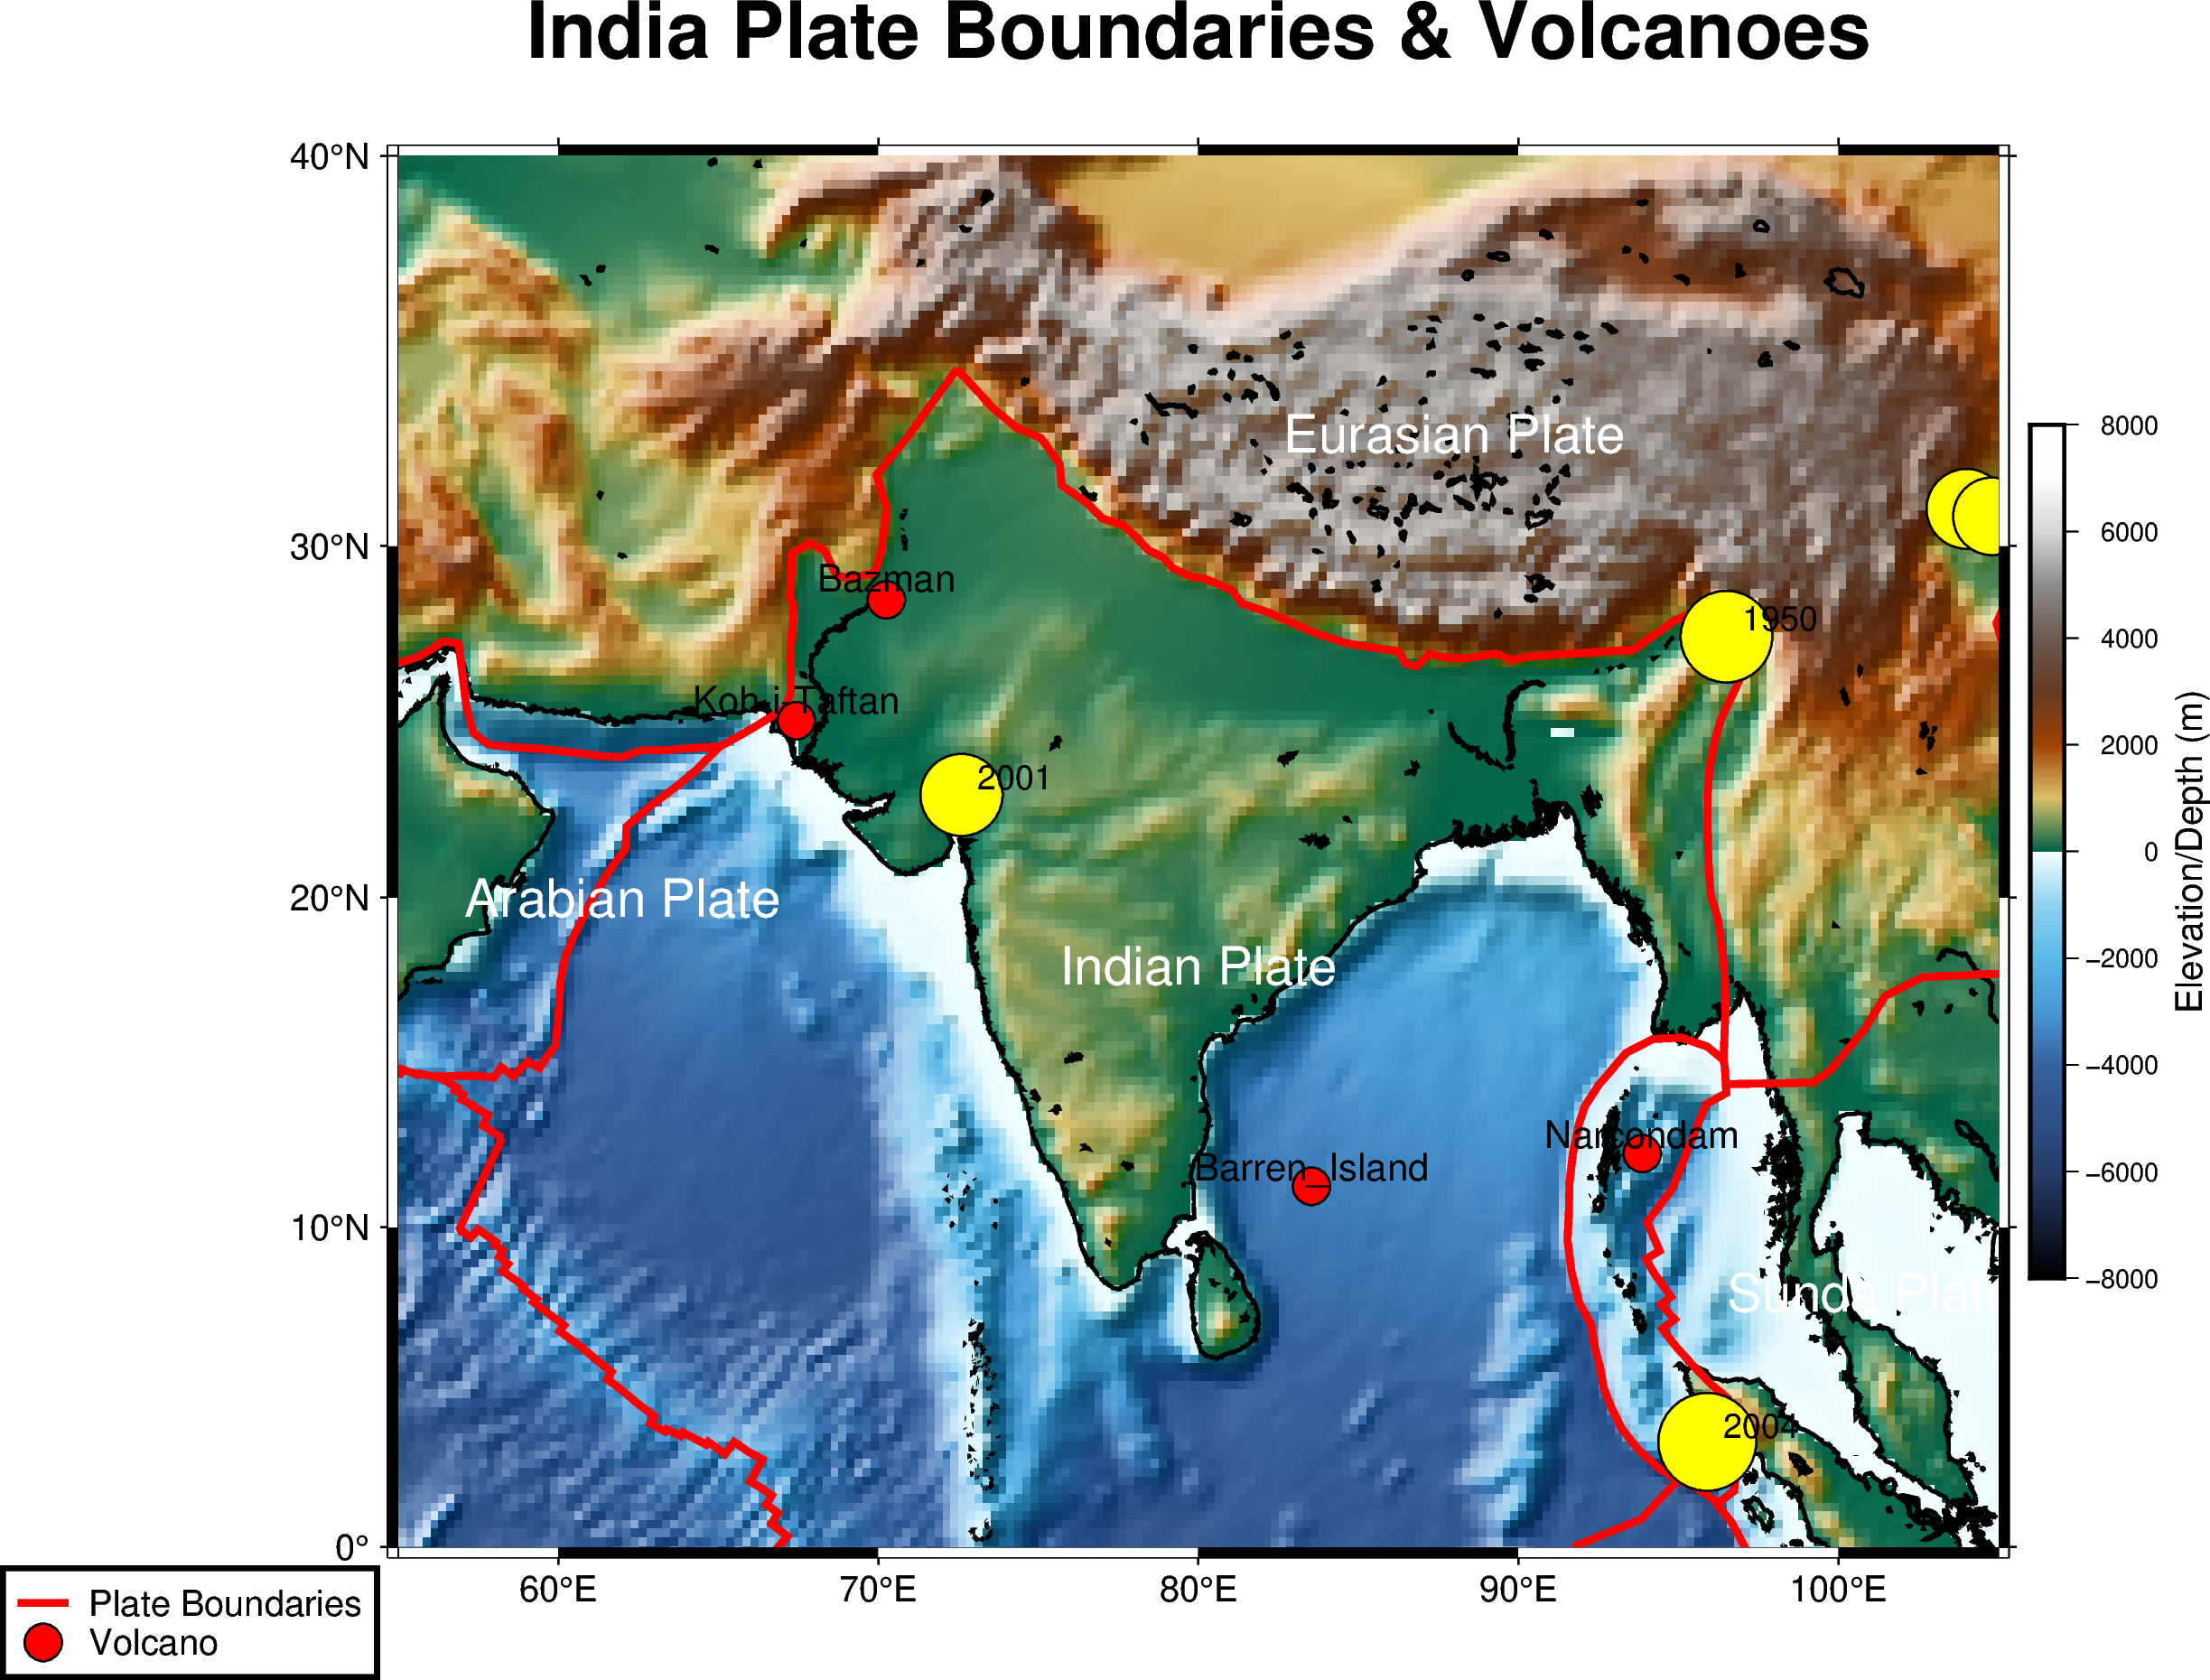

In [44]:
import pygmt
import pandas as pd
import urllib.request
import zipfile
import os # Import os module
from io import StringIO

# ======================================================================
# 1️⃣ 下載 & 解壓 PB2002 板塊邊界 Shapefile
# ======================================================================

zip_url = "https://github.com/fraxen/tectonicplates/archive/refs/heads/master.zip"
urllib.request.urlretrieve(zip_url, "plates.zip")

print("Extracting zip file...")
with zipfile.ZipFile("plates.zip", "r") as z:
    z.extractall("plates")
    # Print the contents of the zip file to understand its structure
    print("Contents inside 'plates.zip':")
    z.printdir()

# Construct the expected path
PLATE_DIR = "plates"
# The zip typically contains a top-level folder 'tectonicplates-master'
# followed by 'PB2002_boundaries.shp' directly.
# Corrected path: removed the extra 'PB2002_boundaries' directory
EXPECTED_SUBPATH = os.path.join("tectonicplates-master", "PB2002_boundaries.shp")
PLATE_FILE = os.path.join(PLATE_DIR, EXPECTED_SUBPATH)

# ======================================================================
# Debugging: Verify the file existence and directory structure
print(f"\n--- Debugging File Path ---")
print(f"Attempting to find shapefile at: {PLATE_FILE}")

if not os.path.exists(PLATE_DIR):
    print(f"Error: Directory '{PLATE_DIR}' not found.")
else:
    print(f"Contents of '{PLATE_DIR}': {os.listdir(PLATE_DIR)}")
    master_dir = os.path.join(PLATE_DIR, "tectonicplates-master")
    if not os.path.exists(master_dir):
        print(f"Error: Directory '{master_dir}' not found. Please check zip structure.")
    else:
        print(f"Contents of '{master_dir}': {os.listdir(master_dir)}")
        # Removed the check for pb_dir as it's no longer expected to be a directory
        if os.path.exists(PLATE_FILE):
            print(f"SUCCESS: Shapefile found at {PLATE_FILE}")
        else:
            print(f"ERROR: Final shapefile '{PLATE_FILE}' not found. Check filename or extension.")
print(f"---------------------------\n")
# ======================================================================


# ======================================================================
# 2️⃣ 火山資料、區域與地形
# ======================================================================

volcano_data_str = """
83.53 11.27 Barren_Island
93.87 12.28 Narcondam
67.43 25.13 Koh-i-Taftan
70.25 28.52 Bazman
"""
volcanoes = pd.read_csv(StringIO(volcano_data_str), sep=r"\s+", header=None, names=['Lon', 'Lat', 'Name'])

REGION = [55, 105, 0, 40]
RELIEF = "@earth_relief_15m"

# ======================================================================
# 3️⃣ 開始繪圖
# ======================================================================

fig = pygmt.Figure()

# 底圖與地形
fig.basemap(region=REGION, projection="M15c", frame=["a", "+tIndia Plate Boundaries & Volcanoes"])
# Fix the makecpt warning by adding an increment (e.g., 1000)
pygmt.makecpt(cmap="geo", series=[-8000, 8000, 1000], continuous=True)
fig.grdimage(RELIEF, shading=True)
fig.coast(shorelines="1p,black")

# ======================================================================
# 4️⃣ 繪製板塊邊界
# ======================================================================

# Only attempt to plot if the file exists
if os.path.exists(PLATE_FILE):
    fig.plot(data=PLATE_FILE, pen="2p,red", label="Plate Boundaries")
else:
    print(f"Skipping plate boundary plot because {PLATE_FILE} was not found.")

# ======================================================================
# 5️⃣ 火山點與名稱
# ======================================================================

fig.plot(x=volcanoes['Lon'], y=volcanoes['Lat'],
         style="c0.35c", fill="red", pen="0.5p,black",
         label="Volcano")

for _, row in volcanoes.iterrows():
    fig.text(x=row.Lon, y=row.Lat + 0.6, text=row.Name, font="10p,black", justify="CM")

# ======================================================================
# 6️⃣ 板塊名稱
# ======================================================================

fig.text(x=80, y=18, text="Indian Plate", font="14p,white", justify="CM")
fig.text(x=88, y=33, text="Eurasian Plate", font="14p,white", justify="CM")
fig.text(x=62, y=20, text="Arabian Plate", font="14p,white", justify="CM")
fig.text(x=101, y=8, text="Sunda Plate", font="14p,white", justify="CM")

# ======================================================================
# 7️⃣ 圖例 & 色階
# ======================================================================

fig.legend(position="JBL+o0.2c", box=True)
fig.colorbar(position="JMR+w8c+v+o0.3c/0",
             frame=["a2000", "x+lElevation/Depth (m)"])


# ======================================================================
# 3️⃣ 歷史地震資料 (經緯度, 震級, 年份)
# ======================================================================
earthquakes_data = """
27.5 96.5 8.6 1950
3.3 95.9 9.2 2004
23.0 72.6 7.7 2001
31.0 104.0 7.5 1933
30.8 104.8 7.3 1976
"""

# ======================================================================
# 7️⃣ 繪製歷史地震
# ======================================================================
for _, row in earthquakes.iterrows():
    # 點大小依震級
    fig.plot(x=row["Lon"], y=row["Lat"], style=f"c{row['Mag']*0.1}c", fill="yellow", pen="0.5p,black")
    # 標示年份
    fig.text(x=row["Lon"]+0.5, y=row["Lat"]+0.5, text=str(int(row["Year"])), font="9p,black", justify="LM")




# ======================================================================
# 8️⃣ 顯示
# ======================================================================

fig.show()
